In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
m = 1.
a = 0.24250109
b = -0.0607718825
c = 0.93240727
d = 0.86473146

def norm(r):
    return np.sqrt(r[0]**2 + r[1]**2)

def f(Y):
    r1 = np.array([Y[0],Y[1]])
    r2 = np.array([Y[2],Y[3]])
    r3 = np.array([Y[4],Y[5]])
    r12 = r2 - r1 
    r13 = r3 - r1
    r23 = r3 - r2
    norm_r12 = norm(r12) 
    norm_r13 = norm(r13)
    norm_r23 = norm(r23)
    return np.array([Y[6], Y[7], Y[8], Y[9], Y[10], Y[11],
                      m*r12[0]/(norm_r12**3) + m*r13[0]/(norm_r13**3),  m*r12[1]/(norm_r12**3) + m*r13[1]/(norm_r13**3),
                     -m*r12[0]/(norm_r12**3) + m*r23[0]/(norm_r23**3), -m*r12[1]/(norm_r12**3) + m*r23[1]/(norm_r23**3),
                     -m*r13[0]/(norm_r13**3) - m*r23[0]/(norm_r23**3), -m*r13[1]/(norm_r13**3) - m*r23[1]/(norm_r23**3)])

def one_Kutta4_step():
    global t
    global Deltat
    global Y
    K1 = f(Y)
    K2 = f(Y + Deltat*(1./2.*K1))
    K3 = f(Y + Deltat*(1./2.*K2))
    K4 = f(Y + Deltat*K3)
    Y+= Deltat * (1./6.*K1 + 1./3.*K2 + 1./3.*K3 + 1./6.*K4)
    t+= float(format(Deltat, '.5f'))
    

In [3]:
chosenstep = one_Kutta4_step

numIter = 1000

r1_0 = np.array([a,b])
r2_0 = np.array([-a,-b])
r3_0 = np.array([0.,0.])
v1_0 = np.array([c,d])
v2_0 = np.array([c,d])
v3_0 = np.array([-2*c,-2*d])
Y = np.array([r1_0[0], r1_0[1], r2_0[0], r2_0[1], r3_0[0], r3_0[1], v1_0[0], v1_0[1], v2_0[0], v2_0[1], v3_0[0], v3_0[1]])

tmax = 1.

t = 0.

Deltat = float(format(tmax/numIter, '.5f'))

history = np.array([[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11]]])

for i in range(numIter):
    chosenstep()
    history = np.append(history,[[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11]]],axis=0)

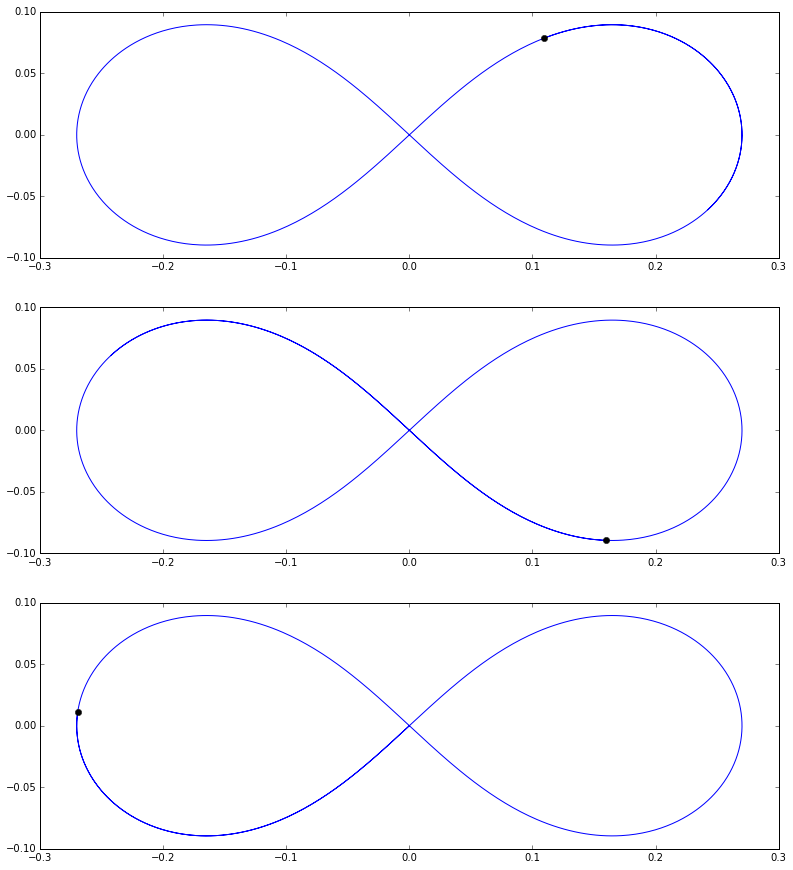

In [4]:
%matplotlib inline
x1 = history[:,1]
y1 = history[:,2]
x2 = history[:,3]
y2 = history[:,4]
x3 = history[:,5]
y3 = history[:,6]
plt.figure(figsize=(20,15))
plt.subplot(3,1,1,aspect = 'equal')
plt.plot(x1,y1)
plt.plot(x1[-1],y1[-1],'ko')
plt.subplot(3,1,2,aspect = 'equal')
plt.plot(x2,y2)
plt.plot(x2[-1],y2[-1],'ko')
plt.subplot(3,1,3,aspect = 'equal')
plt.plot(x3,y3)
plt.plot(x3[-1],y3[-1],'ko')
plt.show()

In [5]:
r1 = np.array([[x1[i],y1[i]] for i in range(len(x1))])
r1 -= r1_0
r1 = r1[1:]
r1 = np.abs(r1)
r1 = np.array([np.sqrt(r1[i][0]**2 + r1[i][1]**2) for i in range(len(r1))])
min_index = np.argmin(r1)
print("%.3f" %history[:,0][min_index+1])

0.791


In [6]:
%matplotlib

time = history[:,0]

fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.3, 0.3), ylim=(-0.1, 0.1))
ax.grid(True) # Add grid
ax.set_aspect('equal')

completetrayectory = ax.plot(x1,y1,"--k",alpha=0.4)
plt.title("Gravitational Choreography\n")

# The following three plot the trails
trayectory1, = ax.plot([], [], '-', lw=2,label="mars")
trayectory2, = ax.plot([], [], '-', lw=2,label="earth")
trayectory3, = ax.plot([], [], '-', lw=2,label="venus")

# The following three plot the current positions
planet1, = ax.plot([], [], 'ok', lw=2)
planet2, = ax.plot([], [], 'ok', lw=2)
planet3, = ax.plot([], [], 'ok', lw=2)

plt.legend(loc='best')
time_template = 'time = %.2f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
dt = 1.0

def animate(i):
    if( i<20 ):
        mini=0
    else:
        mini=i-20
    thisx1 = x1[mini:i]
    thisy1 = y1[mini:i]
    thisx2 = x2[mini:i]
    thisy2 = y2[mini:i]
    thisx3 = x3[mini:i]
    thisy3 = y3[mini:i]

    trayectory1.set_data(thisx1, thisy1)
    trayectory2.set_data(thisx2, thisy2)
    trayectory3.set_data(thisx3, thisy3)
    
    planet1.set_data([x1[i]],[y1[i]])
    planet2.set_data([x2[i]],[y2[i]])
    planet3.set_data([x3[i]],[y3[i]])
    time_text.set_text(time_template%(i*dt))
    return trayectory1, trayectory2, trayectory3, planet1, planet2, planet3, time_text



ani = animation.FuncAnimation(fig, animate, frames=len(time),
    interval=0.1, blit=False)

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=500, metadata=dict(artist='Me'), bitrate=1800)
#ani.save('coreography.mp4', writer=writer)

plt.show()

Using matplotlib backend: Qt4Agg


In [48]:
def f(Y):
    r1 = np.array([Y[0],Y[1]])
    r2 = np.array([Y[2],Y[3]])
    r3 = np.array([Y[4],Y[5]])
    r4 = np.array([Y[6],Y[7]])
    r12 = r2 - r1 
    r13 = r3 - r1
    r14 = r4 - r1
    r23 = r3 - r2
    r24 = r4 - r2
    r34 = r4 - r3
    norm_r12 = norm(r12) 
    norm_r13 = norm(r13)
    norm_r14 = norm(r14)
    norm_r23 = norm(r23)
    norm_r24 = norm(r24)
    norm_r34 = norm(r34)
    return np.array([Y[8], Y[9], Y[10], Y[11], Y[12], Y[13], Y[14], Y[15], 
                      m*r12[0]/(norm_r12**3) + m*r13[0]/(norm_r13**3) + m*r14[0]/(norm_r14**3),
                      m*r12[1]/(norm_r12**3) + m*r13[1]/(norm_r13**3) + m*r14[1]/(norm_r14**3),
                     -m*r12[0]/(norm_r12**3) + m*r23[0]/(norm_r23**3) + m*r24[0]/(norm_r24**3), 
                     -m*r12[1]/(norm_r12**3) + m*r23[1]/(norm_r23**3) + m*r24[1]/(norm_r24**3),
                     -m*r13[0]/(norm_r13**3) - m*r23[0]/(norm_r23**3) + m*r34[0]/(norm_r34**3), 
                     -m*r13[1]/(norm_r13**3) - m*r23[1]/(norm_r23**3) + m*r34[1]/(norm_r34**3),
                     -m*r14[0]/(norm_r14**3) - m*r24[0]/(norm_r24**3) - m*r34[0]/(norm_r34**3), 
                     -m*r14[1]/(norm_r14**3) - m*r24[1]/(norm_r24**3) - m*r34[1]/(norm_r34**3)])


numIter = 1000
a = 0.76012
r1_0 = np.array([0.384277200514,0.])
r2_0 = np.array([-0.0156823005697,-0.13966430504])
r3_0 = np.array([-0.352912599375,0.])
r4_0 = np.array([-0.0156823005697,0.13966430504])
v1_0 = np.array([0.,a])
v2_0 = np.array([-2.01155925929,-1.19817066623])
v3_0 = np.array([0.,1.63619158614])
v4_0 = np.array([2.01155925929,-1.19817066623])
Y = np.array([r1_0[0], r1_0[1], r2_0[0], r2_0[1], r3_0[0], r3_0[1], r4_0[0], r4_0[1], v1_0[0], v1_0[1], v2_0[0],
              v2_0[1], v3_0[0], v3_0[1], v4_0[0], v4_0[1]])

tmax = 1.2

t = 0.

Deltat = float(format(tmax/numIter, '.5f'))

history = np.array([[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11],Y[12],
                     Y[13],Y[14],Y[15]]])

for i in range(numIter):
    chosenstep()
    history = np.append(history,[[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],
                                  Y[11],Y[12],Y[13],Y[14],Y[15]]],axis=0)

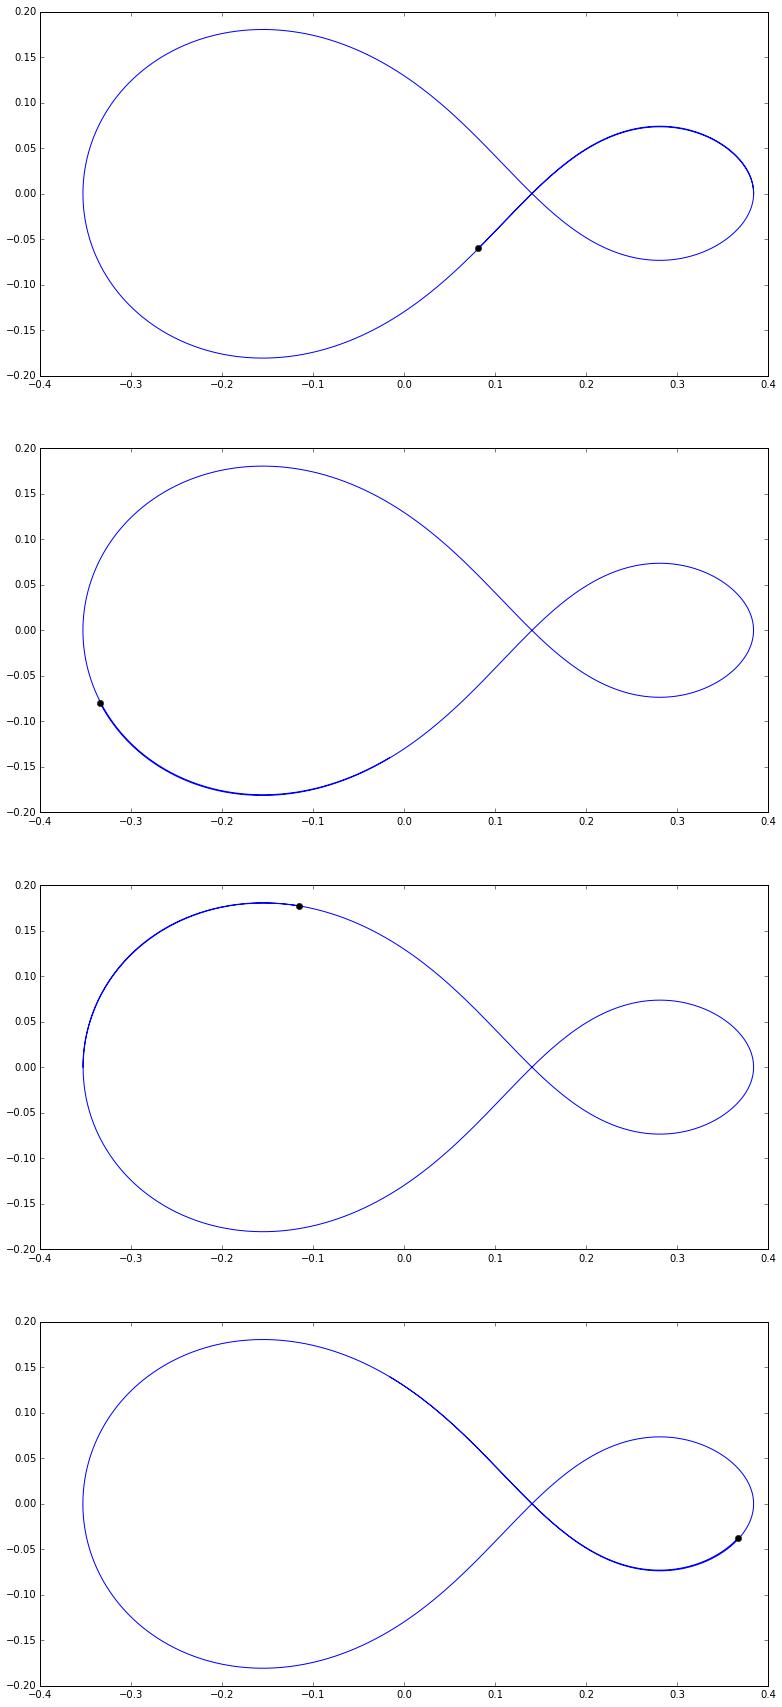

In [49]:
%matplotlib inline
x1 = history[:,1]
y1 = history[:,2]
x2 = history[:,3]
y2 = history[:,4]
x3 = history[:,5]
y3 = history[:,6]
x4 = history[:,7]
y4 = history[:,8]
plt.figure(figsize=(40,30))
plt.subplot(4,1,1,aspect = 'equal')
plt.plot(x1,y1)
plt.plot(x1[-1],y1[-1],'ko')
plt.subplot(4,1,2,aspect = 'equal')
plt.plot(x2,y2)
plt.plot(x2[-1],y2[-1],'ko')
plt.subplot(4,1,3,aspect = 'equal')
plt.plot(x3,y3)
plt.plot(x3[-1],y3[-1],'ko')
plt.subplot(4,1,4,aspect = 'equal')
plt.plot(x4,y4)
plt.plot(x4[-1],y4[-1],'ko')
plt.show()